<a href="https://colab.research.google.com/github/jhubar/master-thesis/blob/main/cord/cord_xlm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Install dependencies

In [1]:
!rm -r transformers
!git clone https://github.com/huggingface/transformers.git
!cd tranformers
!pip install -q ./transformers 

rm: cannot remove 'transformers': No such file or directory
Cloning into 'transformers'...
remote: Enumerating objects: 97168, done.
remote: Counting objects: 100% (305/305), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 97168 (delta 124), reused 145 (delta 62), pack-reused 96863
Receiving objects: 100% (97168/97168), 90.09 MiB | 21.76 MiB/s, done.
Resolving deltas: 100% (71383/71383), done.
/bin/bash: line 0: cd: tranformers: No such file or directory
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... d

In [2]:
!pip install -q datasets seqeval

     |████████████████████████████████| 346 kB 5.1 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 140 kB 53.9 MB/s 
     |████████████████████████████████| 212 kB 45.9 MB/s 
     |████████████████████████████████| 86 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
     |████████████████████████████████| 127 kB 54.1 MB/s 
     |████████████████████████████████| 144 kB 54.9 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 271 kB 24.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
!pip install pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install -q detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 5.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=70bb835e184a41e9d2e216207b01bbb8842dbbf68b739b3c3a04a05624d7275f
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 763.5 MB 15 kB/s 
     |████████████████████████████████| 17.3 MB 1.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
   

In [4]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.1 MB/s 


In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
cord_folder_path = '/content/drive/MyDrive/CORD-2/'
cord_folder_output_path = '/content/drive/MyDrive/CORD-2/cord_output/'
cord_pickel_folder_path = cord_folder_path+'pickel'
train = pd.read_pickle(cord_pickel_folder_path+'/train.pkl')
val = pd.read_pickle(cord_pickel_folder_path+'/dev.pkl')
test = pd.read_pickle(cord_pickel_folder_path+'/test.pkl')

In [24]:
path_folder = "/content/drive/MyDrive/lr_1e5/xlm/cord/"

## Prepare the data



In [7]:
from collections import Counter

all_labels = [item for sublist in train[1] for item in sublist] + [item for sublist in val[1] for item in sublist] + [item for sublist in test[1] for item in sublist]
Counter(all_labels)

Counter({'menu.cnt': 2379,
         'menu.discountprice': 401,
         'menu.etc': 19,
         'menu.itemsubtotal': 7,
         'menu.nm': 6475,
         'menu.num': 109,
         'menu.price': 2535,
         'menu.sub_cnt': 183,
         'menu.sub_etc': 9,
         'menu.sub_nm': 792,
         'menu.sub_price': 156,
         'menu.sub_unitprice': 14,
         'menu.unitprice': 733,
         'menu.vatyn': 9,
         'sub_total.discount_price': 184,
         'sub_total.etc': 279,
         'sub_total.othersvc_price': 6,
         'sub_total.service_price': 347,
         'sub_total.subtotal_price': 1448,
         'sub_total.tax_price': 1261,
         'total.cashprice': 1366,
         'total.changeprice': 1271,
         'total.creditcardprice': 405,
         'total.emoneyprice': 129,
         'total.menuqty_cnt': 614,
         'total.menutype_cnt': 123,
         'total.total_etc': 81,
         'total.total_price': 2089,
         'void_menu.nm': 3,
         'void_menu.price': 1})

Let's replace label noise by the "neutral" label "O" (which stands for "Outside").

In [8]:
replacing_labels = {'menu.etc': 'O', 'mneu.itemsubtotal': 'O', 'menu.sub_etc': 'O', 'menu.sub_unitprice': 'O', 'menu.vatyn': 'O',
                  'void_menu.nm': 'O', 'void_menu.price': 'O', 'sub_total.othersvc_price': 'O'}

In [9]:
def replace_elem(elem):
  try:
    return replacing_labels[elem]
  except KeyError:
    return elem
def replace_list(ls):
  return [replace_elem(elem) for elem in ls]
train[1] = [replace_list(ls) for ls in train[1]]
val[1] = [replace_list(ls) for ls in val[1]]
test[1] = [replace_list(ls) for ls in test[1]]

In [10]:
all_labels = [item for sublist in train[1] for item in sublist] + [item for sublist in val[1] for item in sublist] + [item for sublist in test[1] for item in sublist]
Counter(all_labels)
labels = list(set(all_labels))
print(labels)
label2id = {label: idx for idx, label in enumerate(labels)}
id2label = {idx: label for idx, label in enumerate(labels)}
print(label2id)
print(id2label)


['menu.discountprice', 'menu.price', 'total.changeprice', 'total.total_etc', 'total.emoneyprice', 'total.creditcardprice', 'total.total_price', 'sub_total.service_price', 'menu.num', 'total.cashprice', 'sub_total.discount_price', 'sub_total.subtotal_price', 'total.menutype_cnt', 'menu.cnt', 'menu.sub_price', 'total.menuqty_cnt', 'menu.sub_cnt', 'menu.unitprice', 'sub_total.etc', 'menu.nm', 'O', 'menu.sub_nm', 'sub_total.tax_price', 'menu.itemsubtotal']
{'menu.discountprice': 0, 'menu.price': 1, 'total.changeprice': 2, 'total.total_etc': 3, 'total.emoneyprice': 4, 'total.creditcardprice': 5, 'total.total_price': 6, 'sub_total.service_price': 7, 'menu.num': 8, 'total.cashprice': 9, 'sub_total.discount_price': 10, 'sub_total.subtotal_price': 11, 'total.menutype_cnt': 12, 'menu.cnt': 13, 'menu.sub_price': 14, 'total.menuqty_cnt': 15, 'menu.sub_cnt': 16, 'menu.unitprice': 17, 'sub_total.etc': 18, 'menu.nm': 19, 'O': 20, 'menu.sub_nm': 21, 'sub_total.tax_price': 22, 'menu.itemsubtotal': 23}


Now we have to save all the unique labels in a list.

In [21]:
from os import listdir
from torch.utils.data import Dataset
import torch
from PIL import Image
class BILLYDataset(Dataset):
    """Billy dataset."""

    def __init__(self, annotations, image_dir, processor=None, max_length=512):
        self.words, self.labels, self.boxes = annotations
        self.image_dir = image_dir
        self.image_file_names = [f for f in listdir(image_dir)]
        self.processor = processor
        self.max_length = max_length
        

    def __len__(self):
        return len(self.image_file_names)

    def __getitem__(self, idx):
        item = self.image_file_names[idx]
        image = Image.open(self.image_dir + item).convert("RGB")
        words = self.words[idx]
        
        boxes = self.boxes[idx]
        word_labels = self.labels[idx]

        
        assert len(words) == len(boxes) == len(word_labels)
       
        word_labels = [label2id[label] for label in word_labels]
       
        
        encoded_inputs = processor(image, words, boxes=boxes, word_labels=word_labels,
                              padding="max_length", truncation=True, max_length=512, return_token_type_ids=True,return_tensors="pt")
        
        for k,v in encoded_inputs.items():
          encoded_inputs[k] = v.squeeze()

        assert encoded_inputs.input_ids.shape == torch.Size([512])
        assert encoded_inputs.attention_mask.shape == torch.Size([512])
        assert encoded_inputs.token_type_ids.shape == torch.Size([512])
        assert encoded_inputs.bbox.shape == torch.Size([512, 4])
        assert encoded_inputs.image.shape == torch.Size([3, 224, 224])
        assert encoded_inputs.labels.shape == torch.Size([512]) 
      
        return encoded_inputs
    


In [22]:
# from transformers import LayoutLMv2FeatureExtractor
# from transformers import LayoutXLMTokenizer
# from transformers import LayoutXLMProcessor
# from transformers import LayoutLMv2Processor


# # feature_extractor = LayoutLMv2FeatureExtractor(apply_ocr=False)
# # tokenizer = LayoutXLMTokenizer.from_pretrained("microsoft/layoutxlm-base")
# # processor = LayoutXLMProcessor(feature_extractor,tokenizer)
# processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-large-uncased", apply_ocr=False)




from transformers import LayoutLMv2FeatureExtractor
from transformers import LayoutXLMTokenizer
from transformers import LayoutXLMProcessor

processor = LayoutXLMProcessor.from_pretrained("microsoft/layoutxlm-base", apply_ocr=False)

train_dataset = BILLYDataset(annotations=train,
                            image_dir=cord_folder_path+'train/image/',  
                            processor=processor)
print(len(train_dataset))
val_dataset = BILLYDataset(annotations=val,
                            image_dir=cord_folder_path+'dev/image/',
                            processor=processor)
print(len(val_dataset))
test_dataset = BILLYDataset(annotations=test,
                            image_dir=cord_folder_path+'test/image/',  
                            processor=processor)
print(len(test_dataset))

print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

745
94
93
745
94
93


In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2)
print(len(train_dataloader))
print(len(val_dataloader))
print(len(test_dataloader))


373
47
47


In [ ]:
print(len(test_dataset)+len(val_dataset)+len(train_dataset))

10263


Next, we create corresponding dataloaders.

In [ ]:
# from torch.utils.data import DataLoader
# batch_size = 2
# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# print(len(train_dataloader))
# val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
# print(len(val_dataloader))
# test_dataloader = DataLoader(test_dataset, batch_size=batch_size)
# print(len(test_dataloader))
# print(len(test_dataloader)+len(test_dataloader)+len(train_dataloader))

## Train the model

train the model
learning rate = 1e-5 



In [14]:
import warnings
warnings.filterwarnings("ignore")
from seqeval.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score)

def results_test(preds, out_label_ids, labels):
  preds = np.argmax(preds, axis=2)

  label_map = {i: label for i, label in enumerate(labels)}

  out_label_list = [[] for _ in range(out_label_ids.shape[0])]
  preds_list = [[] for _ in range(out_label_ids.shape[0])]

  for i in range(out_label_ids.shape[0]):
      for j in range(out_label_ids.shape[1]):
          if out_label_ids[i, j] != -100:
              out_label_list[i].append(label_map[out_label_ids[i][j]])
              preds_list[i].append(label_map[preds[i][j]])

  
  results = {
      "precision": precision_score(out_label_list, preds_list),
      "recall": recall_score(out_label_list, preds_list),
      "f1": f1_score(out_label_list, preds_list),
  }
 
  return results,out_label_list, preds_list

In [18]:
from transformers import LayoutLMv2ForTokenClassification, AdamW
import torch
from tqdm.notebook import tqdm
from numpy import asarray
from numpy import savetxt
import numpy as np
print(torch.cuda.get_device_name(0))
model = LayoutLMv2ForTokenClassification.from_pretrained("microsoft/layoutxlm-base",
                                                                      num_labels=len(labels))
labels = list(set(all_labels))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = 'cuda'
print(device)
model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5)


Tesla T4


Some weights of the model checkpoint at microsoft/layoutxlm-base were not used when initializing LayoutLMv2ForTokenClassification: ['layoutlmv2.visual.backbone.bottom_up.res4.13.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.16.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.20.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.15.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.2.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.2.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.0.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.6.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.2.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.4.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.0.shortcut.norm.num_batches_tracked', 'la

cuda:0


In [25]:


val_iterator = iter(val_dataloader)
global_step = 0
num_train_epochs = 4
train_loss = []
val_loss = []
val_precision = []
val_recall = []
val_f1 = []
preds_val = None
out_label_ids = None
batch_logits_array = []
out_label_list=[]
preds_list=[]
val_batch_idx = 0
for epoch in range(num_train_epochs):  
   print("Epoch:", epoch)
   loop = tqdm(train_dataloader, leave=True)
   for batch_id, batch in enumerate(loop):
        model.train() 
        input_ids = batch['input_ids'].to(device)
        bbox = batch['bbox'].to(device)
        image = batch['image'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids,
                        bbox=bbox,
                        image=image,
                        attention_mask=attention_mask,
                        token_type_ids=token_type_ids,
                        labels=labels) 
        loss = outputs.loss
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        if val_batch_idx >= len(val_iterator):
            val_iterator = iter(val_dataloader)
            val_batch_idx = 0
        val_batch_idx += 1
        model.eval()
        with torch.no_grad():
            batch = next(val_iterator)
            input_ids = batch['input_ids'].to(device)
            bbox = batch['bbox'].to(device)
            image = batch['image'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids, bbox=bbox, image=image, attention_mask=attention_mask, 
                            token_type_ids=token_type_ids, labels=labels)
            if preds_val is None:
                preds_val = outputs.logits.detach().cpu().numpy()
                out_label_ids = batch["labels"].detach().cpu().numpy()
            else:
                preds_val = np.append(preds_val, outputs.logits.detach().cpu().numpy(), axis=0)
                out_label_ids = np.append(out_label_ids, batch["labels"].detach().cpu().numpy(), axis=0)
       

        
        loss = outputs.loss
        val_loss.append(loss.item())
         
        if global_step % 100 == 0 or global_step == 0:
            val_result,out_label_l,preds_l = results_test(preds_val, out_label_ids, list(set(all_labels)))
            val_precision.append(val_result['precision'])
            val_recall.append(val_result['recall'])
            val_f1.append(val_result['f1'])
            out_label_list.append(out_label_l)
            preds_list.append(preds_l)


        
            
            print("Overall results:", val_result)
            print(f"Loss after {global_step} steps: {train_loss[-1]}")
            print("Validation loss: {}".format(loss.item()))
        global_step += 1

  #  print(f"{epoch} |  | {loss:^12.6f} | {val_loss:^10.6f}  ")


model.save_pretrained(path_folder +"check_points/LargeCheckpoints_xlm_lr_1e5")
path_model = path_folder +'model/large_model_xlm_btt_qv_lr_star_1e5.pt'
torch.save(model, path_model)


data_loss = pd.DataFrame({'batch_loss_array': train_loss,'val_loss':val_loss})
data_loss.to_csv(path_folder + 'output/logits_btt_qv_large_star_lr_1e5.csv')
data_loss = pd.DataFrame({'precison':val_precision,'recall':val_recall,'f1':val_f1})
data_loss.to_csv(path_folder + 'output/metrics.csv')
data_loss = pd.DataFrame({'preds_list':preds_list,'out_label_list':out_label_list})
data_loss.to_csv(path_folder + 'output/classification_reports.csv')




Epoch: 0


  0%|          | 0/373 [00:00<?, ?it/s]

Overall results: {'precision': 0.0, 'recall': 0.0, 'f1': 0.0}
Loss after 0 steps: 3.266948699951172
Validation loss: 3.2349298000335693
Overall results: {'precision': 0.40807498197548664, 'recall': 0.44885011895321175, 'f1': 0.4274924471299093}
Loss after 100 steps: 1.0975159406661987
Validation loss: 0.6862613558769226
Overall results: {'precision': 0.5753189868596458, 'recall': 0.6040791841631674, 'f1': 0.5893484198205229}
Loss after 200 steps: 0.5364102125167847
Validation loss: 0.38285157084465027
Overall results: {'precision': 0.6603454994155085, 'recall': 0.680406852248394, 'f1': 0.6702260892492254}
Loss after 300 steps: 0.6542526483535767
Validation loss: 0.4628949761390686
Epoch: 1


  0%|          | 0/373 [00:00<?, ?it/s]

Overall results: {'precision': 0.7096868884540117, 'recall': 0.7268991781920224, 'f1': 0.7181899197940389}
Loss after 400 steps: 0.3598598539829254
Validation loss: 0.22192825376987457
Overall results: {'precision': 0.7399029430181591, 'recall': 0.7570273084007367, 'f1': 0.7483671772948581}
Loss after 500 steps: 0.6648678183555603
Validation loss: 0.1094207614660263
Overall results: {'precision': 0.7673795042835655, 'recall': 0.7809650582362728, 'f1': 0.774112679773057}
Loss after 600 steps: 0.0731038749217987
Validation loss: 0.019654491916298866
Overall results: {'precision': 0.7887022212199797, 'recall': 0.7989263891268346, 'f1': 0.7937813838690458}
Loss after 700 steps: 0.7059848308563232
Validation loss: 0.034579046070575714
Epoch: 2


  0%|          | 0/373 [00:00<?, ?it/s]

Overall results: {'precision': 0.8061067946751126, 'recall': 0.8142464383904024, 'f1': 0.8101561722868796}
Loss after 800 steps: 0.1705814003944397
Validation loss: 0.21590514481067657
Overall results: {'precision': 0.8211572438162544, 'recall': 0.8271489588894821, 'f1': 0.8241422111889353}
Loss after 900 steps: 0.2880641222000122
Validation loss: 0.20715433359146118
Overall results: {'precision': 0.8322951605174892, 'recall': 0.8370075894470546, 'f1': 0.8346447234068111}
Loss after 1000 steps: 0.07961327582597733
Validation loss: 0.062267620116472244
Overall results: {'precision': 0.8435839028094153, 'recall': 0.8471677559912854, 'f1': 0.845372031088646}
Loss after 1100 steps: 0.13623292744159698
Validation loss: 0.06644316017627716
Epoch: 3


  0%|          | 0/373 [00:00<?, ?it/s]

Overall results: {'precision': 0.8516558495589949, 'recall': 0.8538156094631119, 'f1': 0.8527343619822042}
Loss after 1200 steps: 0.03298945352435112
Validation loss: 0.16549140214920044
Overall results: {'precision': 0.8593913632723464, 'recall': 0.8606638287371213, 'f1': 0.8600271253313606}
Loss after 1300 steps: 0.14953263103961945
Validation loss: 0.1636732816696167
Overall results: {'precision': 0.8656827412619416, 'recall': 0.8662526116946678, 'f1': 0.8659675827241385}
Loss after 1400 steps: 0.03428042680025101
Validation loss: 0.9365214109420776


In [26]:
# define data
folder = "/content/drive/MyDrive/lr_1e5/xlm/cord"
data_loss = pd.DataFrame({'batch_loss_array': train_loss,'val_loss':val_loss})
data_loss.to_csv(folder + '/output/logits_btt_qv_large_star_lr_1e5.csv')
data_loss = pd.DataFrame({'precison':val_precision,'recall':val_recall,'f1':val_f1})
data_loss.to_csv(folder + '/output/metrics.csv')
data_loss = pd.DataFrame({'preds_list':preds_list,'out_label_list':out_label_list})
data_loss.to_csv(folder + '/output/classification_reports.csv')


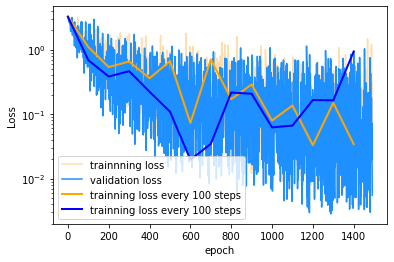

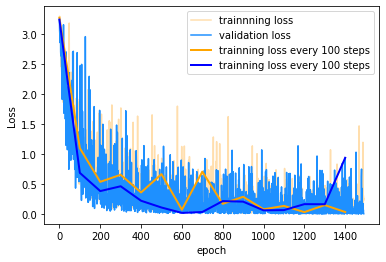

In [27]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 



x_avg_train_loss = []
y_avg_train_loss = []
x_avg_val_loss = []
y_avg_val_loss = []

x_val_precision = []
y_val_precision = []

x_avg_val_recall = []
y_avg_val_recall = []

x_avg_val_f1 = []
y_avg_val_f1 = []

for i in range(0,len(train_loss)):
   if i%100==0:
      x_avg_train_loss.append(i)
      y_avg_train_loss.append(train_loss[i]) 

for i in range(0,len(val_loss)):
   if i%100==0:
      x_avg_val_loss.append(i)
      y_avg_val_loss.append(val_loss[i]) 
      

for i in range(0,len(val_loss)):
  if i%100==0:
    try:
      x_val_precision.append(i)
      y_val_precision.append(val_precision[i])
      x_avg_val_recall.append(i)
      y_avg_val_recall.append(val_recall[i])
      x_avg_val_f1.append(i)
      y_avg_val_f1.append(val_f1[i])
    except:
      break
        

# # Loss 
plt.plot((train_loss), label = 'trainnning loss',color= 'navajowhite')
plt.plot((val_loss),label = 'validation loss',color='dodgerblue')
plt.plot(x_avg_train_loss,y_avg_train_loss,label='trainning loss every 100 steps',linewidth=2,color='orange')
plt.plot(x_avg_val_loss,y_avg_val_loss,label='trainning loss every 100 steps',linewidth=2,color='blue')



plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.savefig(folder+'btt_qv_lr__star_1e5_log_test.png')
plt.legend()
plt.show()
# Loss 
plt.plot((train_loss), label = 'trainnning loss',color= 'navajowhite')
plt.plot((val_loss),label = 'validation loss',color='dodgerblue')
plt.plot(x_avg_train_loss,y_avg_train_loss,label='trainning loss every 100 steps',linewidth=2,color='orange')
plt.plot(x_avg_val_loss,y_avg_val_loss,label='trainning loss every 100 steps',linewidth=2,color='blue')

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(folder+'btt_qv_star_lr_1e5_test.png')
plt.show()



## Evaluation

Let's evaluate the model on the test set. First, let's do a sanity check on the first example of the test set.

In [28]:
import warnings
warnings.filterwarnings("ignore")
from seqeval.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score)
import numpy as np

from transformers import LayoutLMv2ForTokenClassification, AdamW
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = 'cuda'
print(device)
from tqdm.notebook import tqdm
from numpy import asarray
from numpy import savetxt
import numpy as np


preds_val = None
out_label_ids = None

model.eval()
batch_test_array = []
for batch in tqdm(test_dataloader, desc="Evaluating"):
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        bbox = batch['bbox'].to(device)
        image = batch['image'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, bbox=bbox, image=image, attention_mask=attention_mask, 
                        token_type_ids=token_type_ids, labels=labels)
      
        
        if preds_val is None:
          preds_val = outputs.logits.detach().cpu().numpy()
          out_label_ids = batch["labels"].detach().cpu().numpy()
        else:
          preds_val = np.append(preds_val, outputs.logits.detach().cpu().numpy(), axis=0)
          out_label_ids = np.append(
              out_label_ids, batch["labels"].detach().cpu().numpy(), axis=0
          )
        


cuda:0


Evaluating:   0%|          | 0/47 [00:00<?, ?it/s]

In [29]:
import warnings
warnings.filterwarnings("ignore")
from seqeval.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score)

def results_test(preds, out_label_ids, labels):
  preds = np.argmax(preds, axis=2)

  label_map = {i: label for i, label in enumerate(labels)}

  out_label_list = [[] for _ in range(out_label_ids.shape[0])]
  preds_list = [[] for _ in range(out_label_ids.shape[0])]

  for i in range(out_label_ids.shape[0]):
      for j in range(out_label_ids.shape[1]):
          if out_label_ids[i, j] != -100:
              out_label_list[i].append(label_map[out_label_ids[i][j]])
              preds_list[i].append(label_map[preds[i][j]])

  
  results = {
      "precision": precision_score(out_label_list, preds_list),
      "recall": recall_score(out_label_list, preds_list),
      "f1": f1_score(out_label_list, preds_list),
  }
  return results, classification_report(out_label_list, preds_list)

In [30]:
labels = list(set(all_labels))
val_result, class_report = results_test(preds_val, out_label_ids, labels)
print("Overall results:", val_result)
print(class_report)

Overall results: {'precision': 0.9276315789473685, 'recall': 0.9314616019818331, 'f1': 0.9295426452410384}
                         precision    recall  f1-score   support

                enu.cnt       0.97      0.96      0.96       202
      enu.discountprice       0.70      0.70      0.70        10
       enu.itemsubtotal       0.00      0.00      0.00         6
                 enu.nm       0.91      0.95      0.93       229
                enu.num       0.90      0.82      0.86        11
              enu.price       0.95      0.99      0.97       225
            enu.sub_cnt       0.84      0.94      0.89        17
             enu.sub_nm       0.68      0.66      0.67        29
          enu.sub_price       1.00      0.89      0.94        19
          enu.unitprice       0.98      0.97      0.98        66
         otal.cashprice       0.95      0.89      0.92        65
       otal.changeprice       0.89      0.93      0.91        54
   otal.creditcardprice       0.88      0.94   

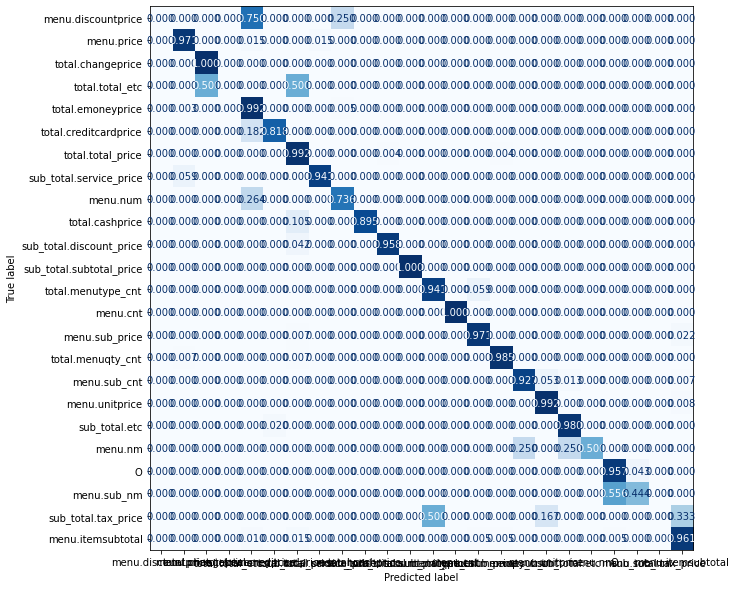

In [31]:
from matplotlib import figure
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import json
import itertools

def plot_confusion_matrix(y_preds,y_true,labels):
  cm = confusion_matrix(y_true,y_preds,normalize= "true")
  fig, ax = plt.subplots(figsize=(10,10))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
  disp.plot(cmap="Blues",values_format=".3f",ax=ax,colorbar=False)
  # plt.title("Normalized confusion matrix")
  plt.show()

def results_cm(preds, out_label_ids, labels):
  preds = np.argmax(preds, axis=2)

  label_map = {i: label for i, label in enumerate(labels)}

  out_label_list = [[] for _ in range(out_label_ids.shape[0])]
  preds_list = [[] for _ in range(out_label_ids.shape[0])]

  for i in range(out_label_ids.shape[0]):
      for j in range(out_label_ids.shape[1]):
          if out_label_ids[i, j] != -100:
              out_label_list[i].append(label_map[out_label_ids[i][j]])
              preds_list[i].append(label_map[preds[i][j]])


  return out_label_list,preds_list
def flatten(list_of_lists):
    if len(list_of_lists) == 0:
        return list_of_lists
    if isinstance(list_of_lists[0], list):
        return flatten(list_of_lists[0]) + flatten(list_of_lists[1:])
    return list_of_lists[:1] + flatten(list_of_lists[1:])

# plot_confusion_matrix(preds_val, out_label_ids, labels)
# preds_val
out_label_list,preds_list =results_cm(preds_val, out_label_ids, labels)

out_label_list = list(itertools.chain(*out_label_list))
preds_list = list(itertools.chain(*preds_list))

data_conf = {'out_label_list':out_label_list,'preds_list':preds_list,'labels':labels}

with open(folder+'/data_conf.json', 'w', encoding='utf-8') as f:
    json.dump(data_conf, f, ensure_ascii=False, indent=4)


plot_confusion_matrix(preds_list,out_label_list, labels)